In [17]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()
#housing= pd.read_csv("california_housing.csv")
print(housing.keys())


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [18]:
df=pd.DataFrame(housing.data,columns=housing.feature_names)
X = df[['MedInc', 'HouseAge', 'AveRooms']]
print(X.head())
y=housing.target
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42
)

   MedInc  HouseAge  AveRooms
0  8.3252      41.0  6.984127
1  8.3014      21.0  6.238137
2  7.2574      52.0  8.288136
3  5.6431      52.0  5.817352
4  3.8462      52.0  6.281853


In [19]:
def linear_regression_analytic(X, y):
    n_samples = X.shape[0]
    X_with_bias = np.column_stack([np.ones(n_samples), X])
    XTX = X_with_bias.T @ X_with_bias
    XTX_inv = np.linalg.inv(XTX)
    XTy = X_with_bias.T @ y
    w = XTX_inv @ XTy
    
    return w

In [20]:
# Calculer les coefficients 
w = linear_regression_analytic(X_train, y_train)
print(w)

[ 0.01357438  0.44191756  0.01683785 -0.02551413]


Q2

In [21]:
print(f"  w0 (biais)    = {w[0]:.4f}")
print(f"  w1 (MedInc)   = {w[1]:.4f}")
print(f"  w2 (HouseAge) = {w[2]:.4f}")
print(f"  w3 (AveRooms) = {w[3]:.4f}")

  w0 (biais)    = 0.0136
  w1 (MedInc)   = 0.4419
  w2 (HouseAge) = 0.0168
  w3 (AveRooms) = -0.0255


q3

In [22]:
def predict_linear(X, w):
    n_samples = X.shape[0]
    X_with_bias = np.column_stack([np.ones(n_samples), X])
    y_pred = X_with_bias @ w
    
    return y_pred

y_pred = predict_linear(X_test, w)
print(y_pred)
print(y_test)

[1.07051203 1.50876025 2.3255861  ... 1.73900293 1.65457087 1.56293034]
[0.477   0.458   5.00001 ... 2.184   1.194   2.098  ]


q4

In [23]:
def mse(y_true, y_pred):
    n = len(y_true)
    mse_value = (1/n) * np.sum((y_true - y_pred)**2)
    return mse_value

mse_test = mse(y_test, y_pred)
print(mse_test)

0.6396642184541402


q5 

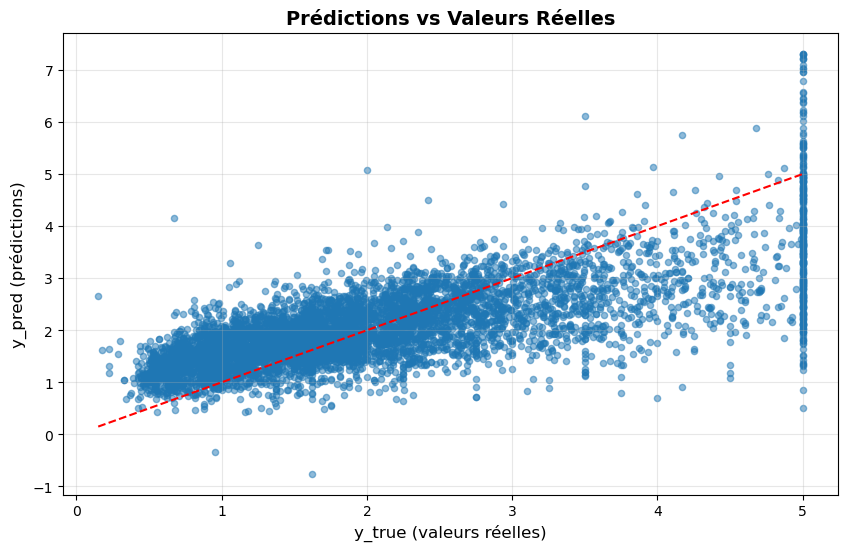

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', label='y = x ')
plt.xlabel('y_true (valeurs réelles)', fontsize=12)
plt.ylabel('y_pred (prédictions)', fontsize=12)
plt.title('Prédictions vs Valeurs Réelles', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

Les points proches de la droite y=x indiquent de bonnes prédictions


In [28]:
# Dataset sans AveRooms (seulement MedInc et HouseAge)
X_reduced = df[['MedInc', 'HouseAge']]
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

# Entraîner le modèle sans AveRooms
w_reduced = linear_regression_analytic(X_train_reduced, y_train_reduced)  # ← utiliser y_train_reduced
y_pred_reduced = predict_linear(X_test_reduced, w_reduced)
mse_reduced = mse(y_test_reduced, y_pred_reduced)


In [29]:
print("mse complet : ", mse_test)
print("mse sans AveRooms : ", mse_reduced)

mse complet :  0.6396642184541402
mse sans AveRooms :  0.6629874283048177


q9 : comparaison

In [30]:
from sklearn.linear_model import LinearRegression

sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)

sklearn_pred = sklearn_model.predict(X_test)
sklearn_mse = mse(y_test, sklearn_pred)
print(mse_test)
print(sklearn_mse)

0.6396642184541402
0.6396642184541402


Régression Logistique sur COMPAS

q1

In [31]:
print(compas.head())
print(compas.columns.tolist())


   Number_of_Priors  score_factor  Age_Above_FourtyFive  Age_Below_TwentyFive  \
0                 0             0                     1                     0   
1                 0             0                     0                     0   
2                 4             0                     0                     1   
3                 0             0                     0                     0   
4                14             1                     0                     0   

   African_American  Asian  Hispanic  Native_American  Other  Female  \
0                 0      0         0                0      1       0   
1                 1      0         0                0      0       0   
2                 1      0         0                0      0       0   
3                 0      0         0                0      1       0   
4                 0      0         0                0      0       0   

   Misdemeanor  Two_yr_Recidivism  sex  age  priors_count  
0            0      

In [47]:
# 1. Préparer les données COMPAS
compas = pd.read_csv("compas.csv")
compas['sex'] = (1 - compas['Female']).astype(int)
compas['age'] = 35
compas.loc[compas['Age_Above_FourtyFive'] == 1, 'age'] = 50
compas.loc[compas['Age_Below_TwentyFive'] == 1, 'age'] = 20
compas['priors_count'] = compas['Number_of_Priors']

X_log = compas[['age', 'sex', 'priors_count']].values
y_log = compas['Two_yr_Recidivism'].values

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log, y_log, test_size=0.3, random_state=42
)

# 2. RÉENTRAÎNER w avec les données COMPAS
w, loss_history = logistic_regression_gradient_descent(
    X_train_log, y_train_log, learning_rate=0.1, epochs=1000
)

print(f"w shape: {w.shape}")  
print(f"Coefficients: {w}")


0.6931471805599453
4.817359918372618
2.5757984000273795
2.891217484980773
2.7650388392444927
3.5869398627243503
5.369105031920502
2.7945340244348316
5.882372592197882
3.512134869366179
w shape: (3,)
Coefficients: [-0.35557543  2.36857318  3.43140153]


q2

In [38]:

def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))
def log_loss(y_true,y_pred):
    epsilon = 1e-15  
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

In [41]:
test_z = np.array([-1, 0, 1])
print(f"({test_z}) = {sigmoid(test_z)}")
test_y_true = np.array([1, 0, 1])
test_y_pred = np.array([0.27, 0.5, 0.73])
test_loss = log_loss(test_y_true, test_y_pred)
print(f"Test log_loss = {test_loss:.4f}")
print()

([-1  0  1]) = [0.26894142 0.5        0.73105858]
Test log_loss = 0.7724



In [43]:
#q3
def logistic_regression_gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    loss_history = []
 
    for epoch in range(epochs):
        z = X @ w  
        y_pred = sigmoid(z)
    
        loss = log_loss(y, y_pred)
        loss_history.append(loss)    
        gradient = (1/n_samples) * X.T @ (y_pred - y)   
        w -= learning_rate * gradient
        if epoch % 100 == 0:
            print(loss)
    return w,loss_history

w, loss_history = logistic_regression_gradient_descent(X_train_log, y_train_log, learning_rate=0.01, epochs=1000)
print( w)

0.6931471805599453
0.8449537753516059
0.8287425167134261
0.827010102202581
0.8259897866693919
0.8250457583991483
0.8241464597260519
0.823288339153158
0.8224692343995451
0.8216871493893402
[-0.00079224  0.27257976  0.32919356]


In [49]:
def predict_logistic(X, w, threshold=0.5):
    z = X @ w
    probabilities = sigmoid(z)
    predictions = (probabilities >= threshold).astype(int)
    return predictions

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

y_pred_train = predict_logistic(X_train_log, w)

print(accuracy(y_train_log, y_pred_train))

0.6694444444444444


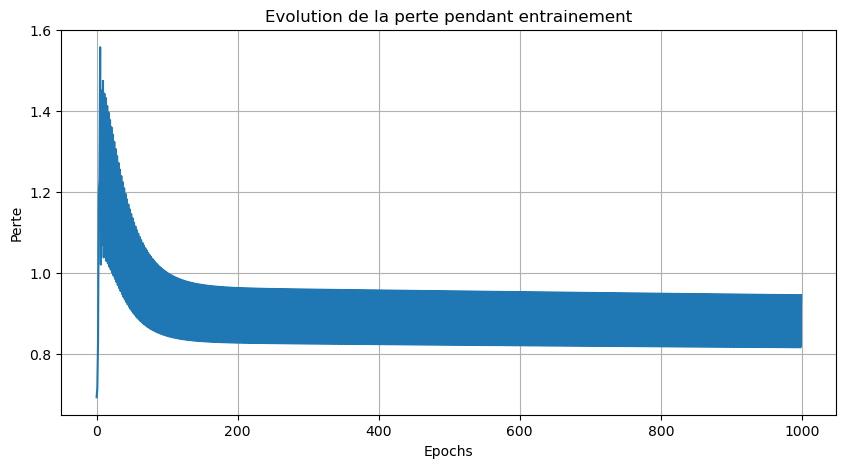

In [52]:
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Perte')
plt.title('Evolution de la perte pendant entrainement')
plt.grid(True)


In [55]:
exp_w = np.exp(w)
for i, feature in enumerate(['age', 'sex', 'priors_count']):
    print(f"exp(w_{i}) pour {feature}: {exp_w[i]:.4f}")
    if exp_w[i] > 1:
        augmentation = (exp_w[i] - 1) * 100
        print(f"  -> Augmente les odds de {augmentation:.1f}%")
    else:
        diminution = (1 - exp_w[i]) * 100
        print(f"  -> Diminue les odds de {diminution:.1f}%")
if w[1] > 0:
    print(f"Le coefficient pour 'sex' (homme=1) est positif ({w[1]:.4f}).")
    print("Cela signifie que le modele predit un risque plus eleve pour les hommes.")
else:
    print(f"Le coefficient pour 'sex' est {w[1]:.4f}.")
    print("Analyse du biais de genre dans les predictions.")

exp(w_0) pour age: 0.7008
  -> Diminue les odds de 29.9%
exp(w_1) pour sex: 10.6821
  -> Augmente les odds de 968.2%
exp(w_2) pour priors_count: 30.9199
  -> Augmente les odds de 2992.0%
Le coefficient pour 'sex' (homme=1) est positif (2.3686).
Cela signifie que le modele predit un risque plus eleve pour les hommes.
BIAIS ETHIQUE: Le sexe ne devrait pas influencer la prediction de recidive.
Ce biais peut perpetuer des discriminations systemiques.


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model_sklearn = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
model_sklearn.fit(X_train_log, y_train_log)

print("Coefficients sklearn:", model_sklearn.coef_[0])
print("Biais sklearn:", model_sklearn.intercept_[0])

y_pred_sklearn = model_sklearn.predict(X_test_log)
accuracy_sklearn = accuracy_score(y_test_log, y_pred_sklearn)
conf_matrix_sklearn = confusion_matrix(y_test_log, y_pred_sklearn)

print(f"Accuracy sklearn: {accuracy_sklearn:.4f}")
print("Matrice de confusion sklearn:")
print(conf_matrix_sklearn)

Coefficients sklearn: [-0.04911896  0.43330827  0.18434289]
Biais sklearn: 0.6158364520111091
Accuracy sklearn: 0.6625
Matrice de confusion sklearn:
[[737 283]
 [342 490]]


In [62]:
features = ['age', 'sex', 'priors_count']
for i, feature in enumerate(features):
    diff = abs(w[i] - model_sklearn.coef_[0][i])
    print(f"{feature:<15} {w[i]:<12.4f} {model_sklearn.coef_[0][i]:<12.4f} {diff:<12.6f}")

age             -0.3556      -0.0491      0.306456    
sex             2.3686       0.4333       1.935265    
priors_count    3.4314       0.1843       3.247059    
